# Determining Jumps/Lands - Finding Peaks and their Widths

The goal of this notebook is to prototype the way we determine when a user jumps and lands.

The data input is pressure sensor data. I simulate the data in this notebook. The goal is to find peaks and the duration of the peak

In [1]:
import numpy as np                    
import matplotlib.pyplot as plt 

from scipy import signal


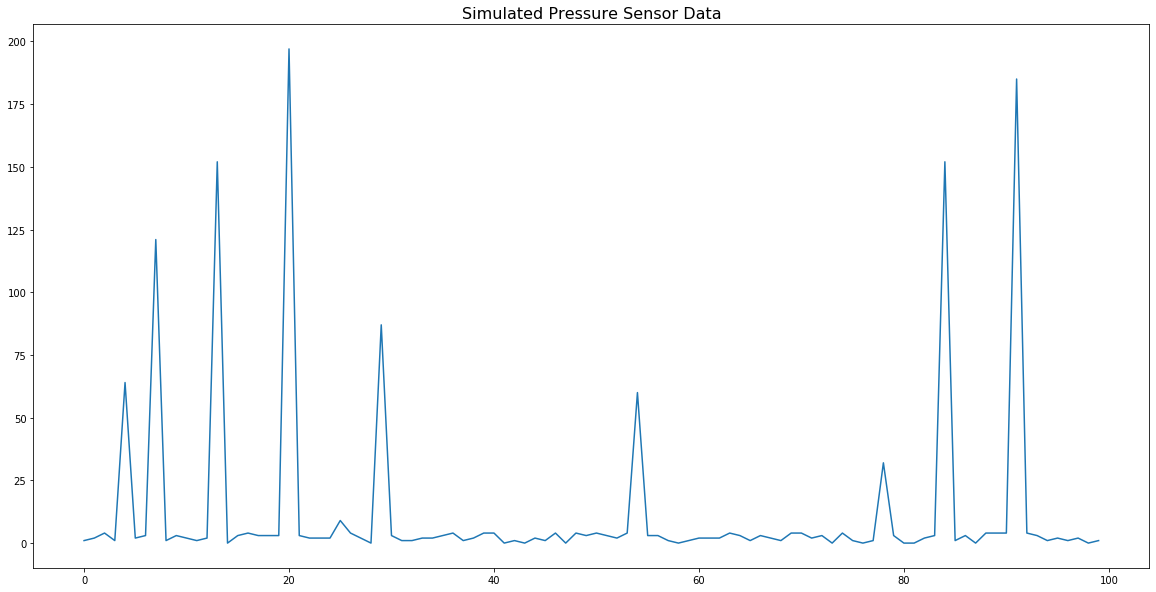

In [2]:
peaks     = np.random.randint(0,200,10)
non_peaks = np.random.randint(0,5,90)
data      = np.concatenate((peaks,non_peaks))
np.random.shuffle(data)

plt.figure(figsize = (20,10))
plt.title("Simulated Pressure Sensor Data", size = 16)
plt.plot(data)

In [3]:
MIN_HEIGHT = 25

peaks, a = signal.find_peaks(data, height = MIN_HEIGHT)

In [4]:
results_half = signal.peak_widths(data, peaks, rel_height=0.5)
results_full = signal.peak_widths(data, peaks, rel_height=0.95)

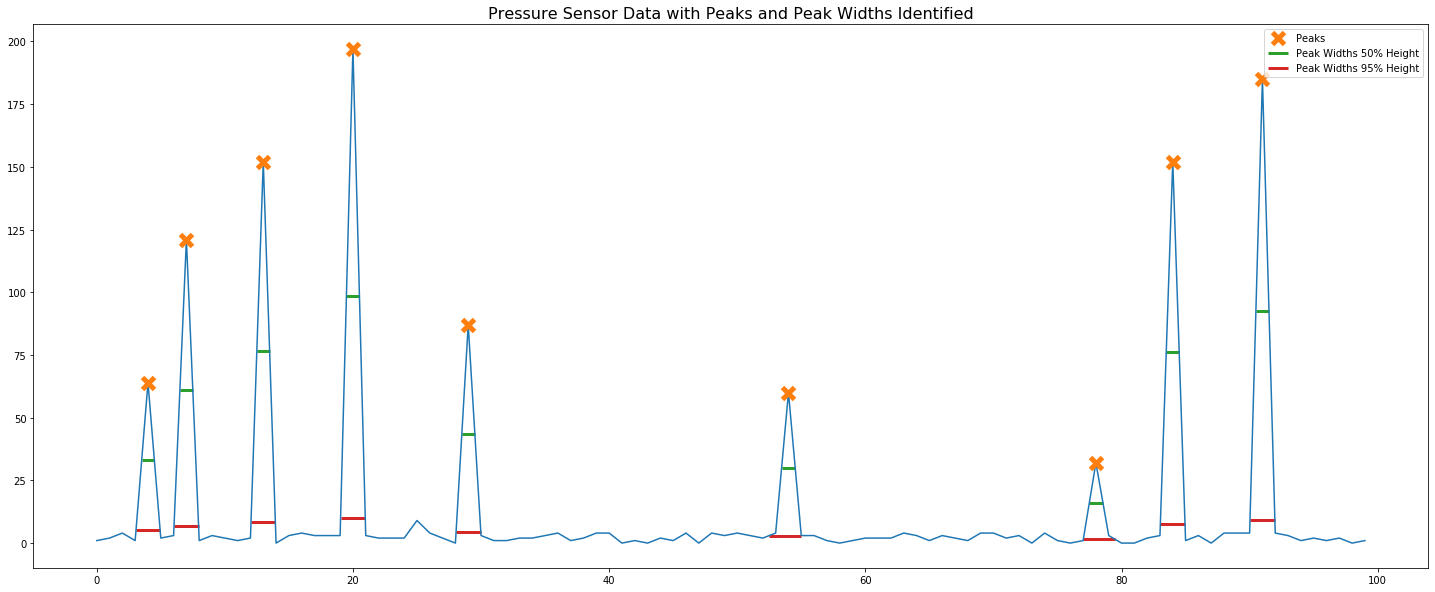

In [5]:
plt.figure(figsize = (25,10))

plt.plot(data)
plt.plot(peaks, data[peaks], "x", markersize = 12, mew = 5, label = "Peaks")
plt.hlines(*results_half[1:], color="C2", linewidth = 3, label = "Peak Widths 50% Height")
plt.hlines(*results_full[1:], color="C3", linewidth = 3, label = "Peak Widths 95% Height")
plt.legend()
plt.title("Pressure Sensor Data with Peaks and Peak Widths Identified", size = 16)

plt.show()

In [6]:
def get_jumps_lands(pressure_data):
    """
        Processes pressure sensor data over an arbitrary amount of time
        to find the start and end timestamps of when a user jumps or lands

        Args:
            pressure_data: a 1-D numpy array denoting pressure sensor data

        Returns:
            start_times: a 1-D numpy array denoting start times
            end_times  : a 1-D numpy array denoting end times
    """
    
    MIN_HEIGHT = 25
    PEAK_WIDTH_HEIGHT = 0.95

    peaks, _ = signal.find_peaks(pressure_data, height = MIN_HEIGHT)
    
    # results full contains 4 arrays: widths, width_height, start_time, end_time
    results_full = signal.peak_widths(pressure_data, peaks, rel_height = PEAK_WIDTH_HEIGHT)
    
    return results_full[2:]
    

In [7]:
get_jumps_lands(data)

(array([ 3.06507937,  6.03389831, 12.04366667, 19.03530928, 28.05      ,
        52.5       , 77.01935484, 83.03087248, 90.02900552]),
 array([ 4.95      ,  7.95      , 13.94375   , 20.96469072, 29.98392857,
        55.        , 79.46666667, 84.95629139, 91.97099448]))

In [9]:
list(zip([1,2,3],[4,5,6]))

[(1, 4), (2, 5), (3, 6)]